In [2]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import lz4.frame as lz4f
import cloudpickle as cpkl
import json
import re
import os

import uproot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot, export

In [3]:
with lz4f.open("hists_wtag_3.cpkl.lz4") as fin:
    hists_unmapped = cpkl.load(fin)

<Hist (dataset,AK8Puppijet0_isHadronicV) instance at 0x7fbaa1c8e0b8>


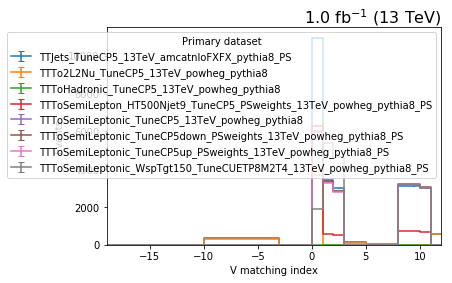

In [6]:
# plot unmapped hist
a = hists_unmapped['templates_Wtagregion'].sum('AK8Puppijet0_pt','AK8Puppijet0_msd','ak8jet_n2ddt','systematic', overflow='all')["TT*",:]
print(a)
fig, ax, _ = plot.plot1d(a, overlay='dataset', error_opts={},overflow='under')
lumi = ax.text(1., 1., r"%.1f fb$^{-1}$ (13 TeV)" % 1.,
                 fontsize=16, 
                 horizontalalignment='right', 
                 verticalalignment='bottom', 
                 transform=ax.transAxes,
                )

In [4]:
import processmap
hists = {}
for key, val in hists_unmapped.items():
    if isinstance(val, hist.Hist):
        hists[key] = processmap.apply(val)

In [7]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()

process_map["data_obs"] = ("SingleMuon*",slice(None))
nodata = re.compile("(?!SingleMuonRun2017B_17Nov2017_v1)(?!SingleMuonRun2017C_17Nov2017_v1)(?!SingleMuonRun2017D_17Nov2017_v1)(?!SingleMuonRun2017E_17Nov2017_v1)(?!SingleMuonRun2017F_17Nov2017_v1)")
process_map["unmatched"] = (nodata, slice(None,5))
process_map["matched"] = (nodata, slice(5,None))

hists = {}
for key, val in hists_unmapped.items():
    if isinstance(val, hist.Hist):
        hists[key] = val.group(process, process_cats, process_map)

print(hists)

/home/sangeon/Research/SangeonPark/coffeandbacon/fnal-column-analysis-tools/fnal_column_analysis_tools/hist/hist_tools.py:391: RuntimeWarning: Reducing along axis <Bin (name=AK8Puppijet0_isHadronicV) instance at 0x7fbaa1ce5358>: requested stop 5 between bin boundaries, no interpolation is performed
  warnings.warn("Reducing along axis %r: requested stop %r between bin boundaries, no interpolation is performed" % (self, the_slice.stop), RuntimeWarning)
/home/sangeon/Research/SangeonPark/coffeandbacon/fnal-column-analysis-tools/fnal_column_analysis_tools/hist/hist_tools.py:379: RuntimeWarning: Reducing along axis <Bin (name=AK8Puppijet0_isHadronicV) instance at 0x7fbaa1ce5358>: requested start 5 between bin boundaries, no interpolation is performed
  warnings.warn("Reducing along axis %r: requested start %r between bin boundaries, no interpolation is performed" % (self, the_slice.start), RuntimeWarning)


{'nminus1_pfmet_signalregion': <Hist (process,AK8Puppijet0_pt,AK8Puppijet0_msd,AK8Puppijet0_deepdoubleb,pfmet) instance at 0x7fbaa8c92198>, 'jetpt_muoncontrol': <Hist (process,AK8Puppijet0_pt) instance at 0x7fbaa8e80b38>, 'templates_hCCsignalregion': <Hist (process,systematic,AK8Puppijet0_pt,AK8Puppijet0_msd,AK8Puppijet0_deepdoublec) instance at 0x7fbaa8c92da0>, 'opposite_ak8_n3sdb1_signalregion': <Hist (process,AK8Puppijet0_pt,AK8Puppijet0_msd,opposite_ak8_n3sdb1) instance at 0x7fbaa1ce5240>, 'muonpt_muoncontrol': <Hist (process,vmuoLoose0_pt) instance at 0x7fbaa8f10240>, 'njets_ak4_signalregion': <Hist (process,AK8Puppijet0_pt,AK8Puppijet0_msd,nAK4PuppijetsPt30) instance at 0x7fbaa1bbf160>, 'jeteta_preselection': <Hist (process,AK8Puppijet0_eta) instance at 0x7fbaa9078da0>, 'jetpt_signalregion': <Hist (process,AK8Puppijet0_pt) instance at 0x7fbaa8f9fac8>, 'nminus1_muonDphiAK8_muoncontrol': <Hist (process,AK8Puppijet0_msd,AK8Puppijet0_deepdoubleb,muon_dphi) instance at 0x7fbaa8f18748>

In [11]:
# n2ddt plot
x = (hists['templates_Wtagregion']
         #.sum('AK8Puppijet0_isHadronicV',  overflow='all')
         .project('AK8Puppijet0_msd',slice(50,110))
         #.project('AK8Puppijet0_msd')
         .sum('ak8jet_n2ddt')
         .project('systematic', '')
         .sum('AK8Puppijet0_pt')
         #.project('AK8Puppijet0_pt',slice(200,None))
    )
#xaxis = 'ak8jet_n2ddt'
xaxis = 'AK8Puppijet0_isHadronicV'
#x.sum(xaxis)#.values()

In [12]:
# mass pass distribution
x = (hists['templates_Wtagregion']
         #.sum('AK8Puppijet0_isHadronicV', overflow='all')
         .project('systematic', '')
         .sum('AK8Puppijet0_pt')
         .project('ak8jet_n2ddt', slice(None,0))
    )[:,slice(50,110)]
xaxis = 'AK8Puppijet0_msd'
print(x)
x.sum(xaxis).values()

<Hist (process,AK8Puppijet0_msd) instance at 0x7fbaa1ba77f0>


{('data_obs',): 8318.0, ('matched',): 349.4864, ('unmatched',): 869.43835}

In [13]:
# mass fail distribution
x = (hists['templates_Wtagregion']
         #.sum('AK8Puppijet0_isHadronicV', overflow='all')
         .project('systematic', '')
         .sum('AK8Puppijet0_pt')
         .project('ak8jet_n2ddt', slice(0,None))
    )[:,slice(50,110)]
xaxis = 'AK8Puppijet0_msd'
x.sum(xaxis).values()

{('data_obs',): 15152.0, ('matched',): 405.9809, ('unmatched',): 1317.4819}

In [14]:
# mass pass distribution for matched - unmatched
x = (hists['templates_Wtagregion']
         #.sum('AK8Puppijet0_isHadronicV', overflow='all')
         .project('systematic', '')
         .sum('AK8Puppijet0_pt')
         .project('ak8jet_n2ddt', slice(None,0))
    )[:,slice(50,110)]
xaxis = 'AK8Puppijet0_msd'
print(x)
x.sum(xaxis).values()

<Hist (process,AK8Puppijet0_msd) instance at 0x7fbaa1ba2240>


{('data_obs',): 8318.0, ('matched',): 349.4864, ('unmatched',): 869.43835}

In [15]:
# scale by lumi
lumi = 41.1  # SingleMuon
nodata = re.compile("(?!data_obs)")
print({p: lumi for p in x[nodata].identifiers('process')})
x.scale({p: lumi for p in x[nodata].identifiers('process')}, axis="process")
datasum = x["data_obs"].sum('process', xaxis).values()[()]
nodatasum = x[nodata].sum('process', xaxis).values()[()]
print(datasum)
print(nodatasum)

{'unmatched': 41.1, 'matched': 41.1}
8318.0
50097.805


NameError: name 'x' is not defined

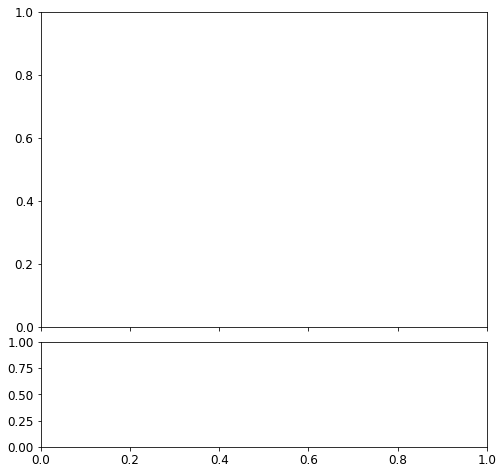

In [8]:
#plots
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
})
fig, (ax, rax) = plt.subplots(2, 1, figsize=(8,8), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label':'Stat. Unc.',
    'hatch':'///',
    'facecolor':'none',
    'edgecolor':(0,0,0,.5),
    'linewidth': 0
}
data_err_opts = {
    'linestyle':'none',
    'marker': '.',
    'markersize': 10.,
    'color':'k',
    'elinewidth': 1,
    'emarker': '_'
}

plot.plot1d(x[nodata],
            overlay='process', 
            ax=ax,
            clear=False,
            stack=True,
            fill_opts=fill_opts,
            error_opts=error_opts,
            #overflow='under'
           )
plot.plot1d(x["data_obs"],
            overlay='process',
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
            #overflow='under'
           )

#ax.autoscale(axis='x', tight=True)
#ax.set_xlim(50,110)
ax.set_ylim(0, None)
#ax.set_yscale('log')

ax.set_xlabel(None)
ax.ticklabel_format(axis='x', style='sci')
leg = ax.legend(title='W-tag CR',ncol=1)

plot.plotratio(x["data_obs"].sum("process"), x[nodata].sum("process"), 
               ax=rax,
               error_opts=data_err_opts, 
               denom_fill_opts={},
               guide_opts={},
               unc='num',
               #overflow='under'
              )
rax.set_ylabel('Ratio')
#rax.set_xlim(50,110)
rax.set_ylim(0.5, 1.5)

coffee = plt.text(0., 1., u"CMS",
                  fontsize=18,
                  fontweight='bold',
                  horizontalalignment='left', 
                  verticalalignment='bottom', 
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"%.1f fb$^{-1}$ (13 TeV)" % lumi,
                fontsize=16, 
                horizontalalignment='right', 
                verticalalignment='bottom', 
                transform=ax.transAxes
               )

#fig.savefig("%s.pdf" % hname)


(<Figure size 576x576 with 2 Axes>,
 {'data_obs': [(<ErrorbarContainer object of 3 artists>,
    <ErrorbarContainer object of 3 artists>)]})

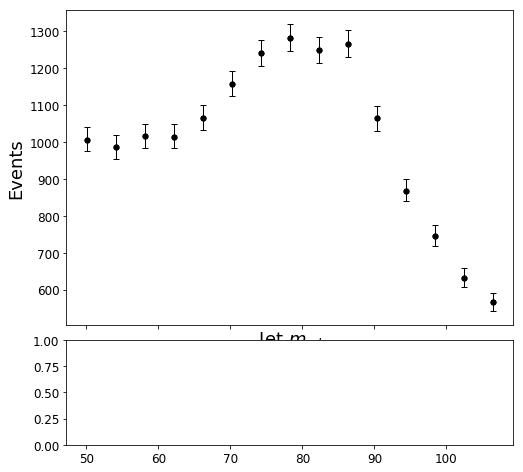

In [22]:
fig, (ax, rax) = plt.subplots(2, 1, figsize=(8,8), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
plot.plot1d(x["data_obs"],
            overlay='process',
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
            #overflow='under'
           )